In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import datetime

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

In [3]:
time = pd.read_csv('RELIANCE.NS.csv',
                   parse_dates=['Date'], index_col='Date',
                   date_parser=dateparse)
time.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,443.149994,446.000000,441.825012,443.950012,416.926727,1354878.0
2015-01-02,444.049988,448.024994,442.149994,442.774994,415.823212,3351654.0
2015-01-05,442.500000,445.450012,437.049988,437.924988,411.268433,4619182.0
2015-01-06,435.000000,436.500000,416.000000,418.049988,392.603241,8516086.0
2015-01-07,418.549988,429.399994,418.500000,427.149994,401.149353,9472630.0


In [4]:
time.shape

(1330, 6)

# Missing Value

In [5]:
time.isnull().sum()

Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [6]:
time=time.ffill()

In [7]:
time.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
time.shape

(1330, 6)

In [9]:
time1 = time['Close']
time1.head()

Date
2015-01-01    443.950012
2015-01-02    442.774994
2015-01-05    437.924988
2015-01-06    418.049988
2015-01-07    427.149994
Name: Close, dtype: float64

In [10]:
time1.tail()

Date
2020-05-22    1431.550049
2020-05-26    1424.050049
2020-05-27    1445.550049
2020-05-28    1472.250000
2020-05-29    1464.400024
Name: Close, dtype: float64

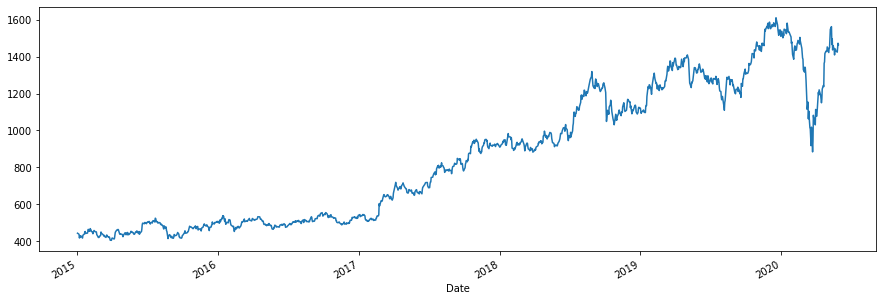

In [11]:
time1.plot(kind="line",figsize=(15,5))
plt.show()

# Split

In [12]:
time1.shape[0]*0.9

1197.0

In [13]:
train=time1[3:1197] 
test=time1[1197:]

In [14]:
train.head()

Date
2015-01-06    418.049988
2015-01-07    427.149994
2015-01-08    421.024994
2015-01-09    430.149994
2015-01-12    425.149994
Name: Close, dtype: float64

In [15]:
test.head()

Date
2019-11-14    1462.750000
2019-11-15    1470.849976
2019-11-18    1459.199951
2019-11-19    1509.750000
2019-11-20    1547.650024
Name: Close, dtype: float64

In [16]:
#train.tail()

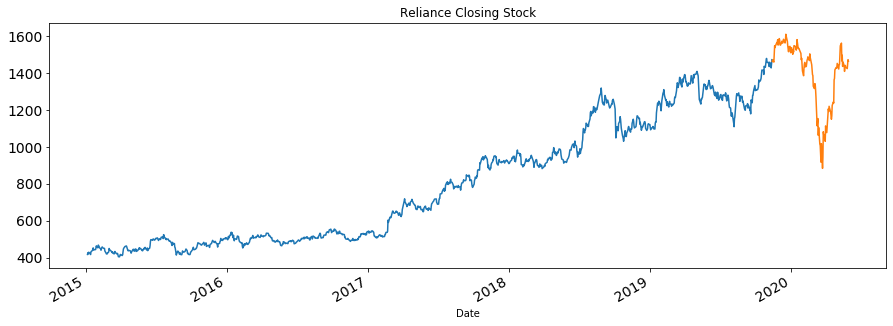

In [17]:
train.plot(figsize=(15,5), title= 'Reliance Closing Stock', fontsize=14)
test.plot(figsize=(15,5), title= 'Reliance Closing Stock', fontsize=14)
plt.show()

# Decomposition

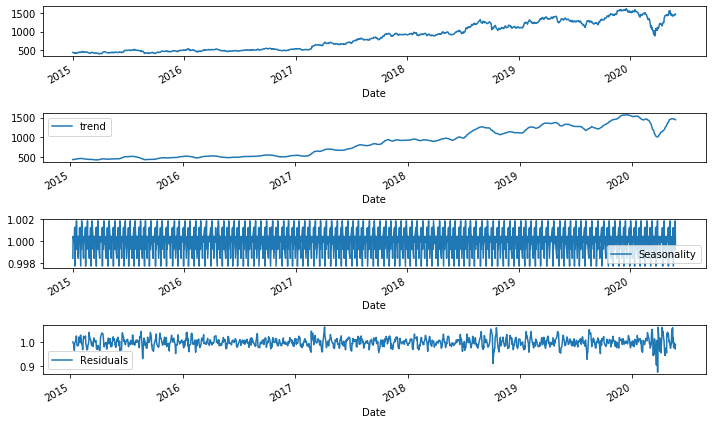

In [18]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(time1,model='multiplicative', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
time1.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

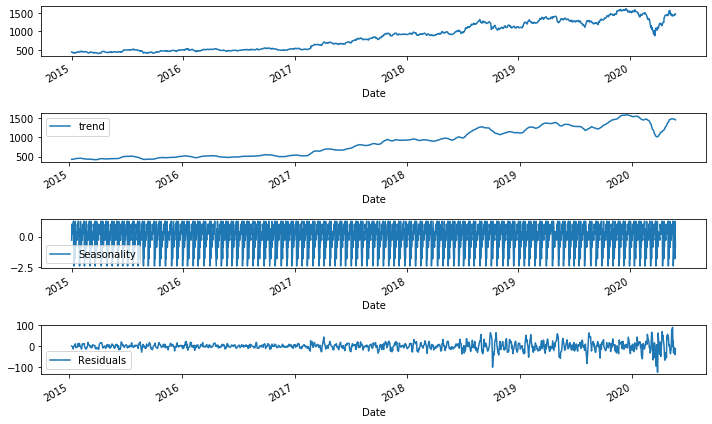

In [19]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(time1,model='additive', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
time1.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Moving Average

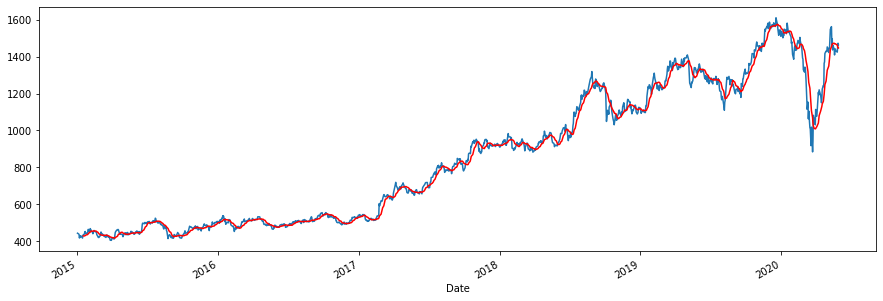

In [20]:
moving_avg =time1.rolling(12).mean()
time1.plot(kind="line",figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='red')
plt.show()

# SimpleExpSmoothing

In [21]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [22]:
train = train.astype('double')
ses = SimpleExpSmoothing(train).fit()
ses1 = ses.forecast(133)
ses.summary()

C:\Users\RISHIK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\RISHIK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


Dep. Variable:,endog,No. Observations:,1194
Model:,SimpleExpSmoothing,SSE,240244.542
Optimized:,True,AIC,6337.392
Trend:,None,BIC,6347.562
Seasonal:,None,AICC,6337.426
Seasonal Periods:,None,Date:,"Thu, 11 Jun 2020"
Box-Cox:,False,Time:,15:26:48
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,418.04999,l.0,True


No handles with labels found to put in legend.


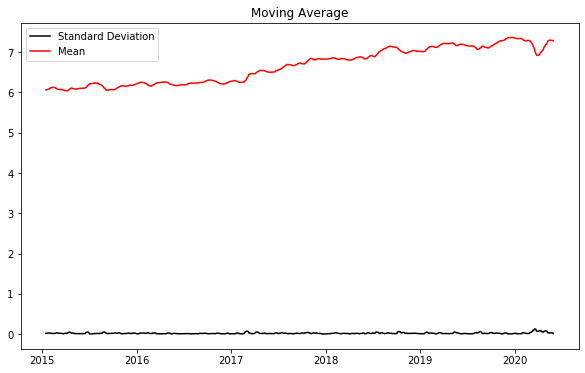

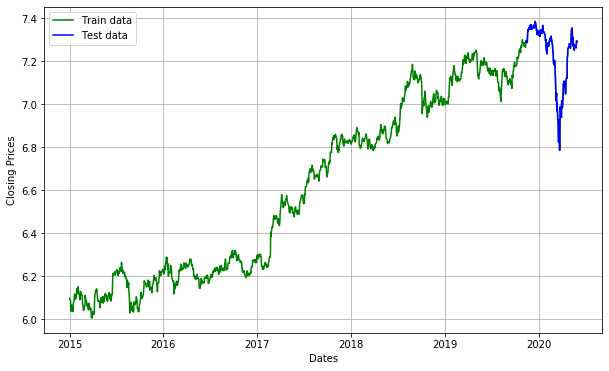

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(time1)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# report performance
mse = mean_squared_error(test_data, ses1)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, ses1)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, ses1))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(ses1 - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))
#Around 3.5% MAPE implies the model is about 96.5% accurate in predicting the next 15 observations.

MSE: 2146399.221202068
MAE: 1465.059453417077
RMSE: 1465.0594599544647
MAPE: nan


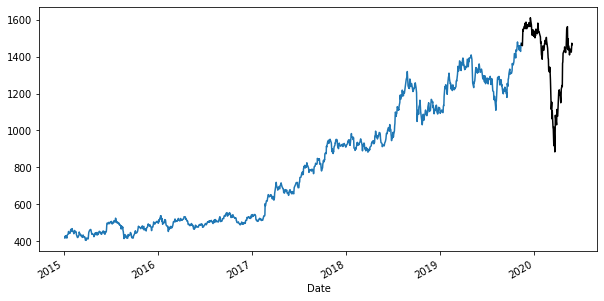

In [25]:
train.plot(kind="line",figsize=(10,5))
#ses1.plot(kind="line",figsize=(10,5),color='orange')
test.plot(kind="line",figsize=(10,5),color='black')
plt.show()

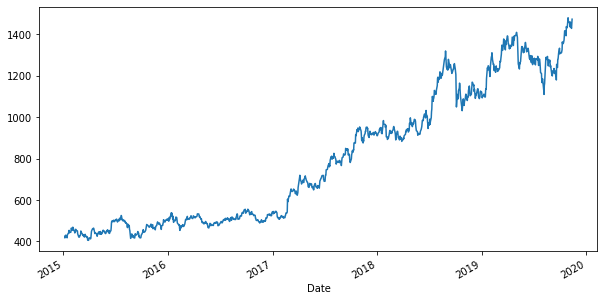

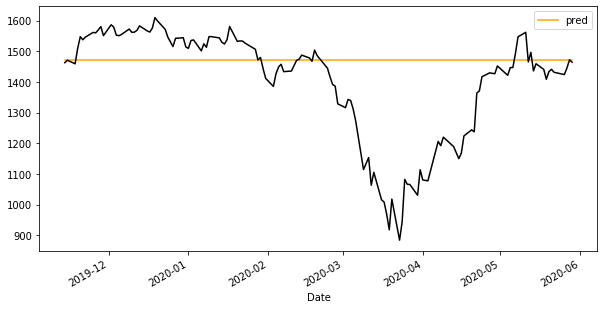

In [26]:

test.shape

a=test.index[0:133]

ses1.shape

ses1.head()

ses1.iloc[0:133]

ses3 = pd.DataFrame(ses1,columns=['pred'])
ses3.head()
ses3.set_index(a,inplace=True)

ses3.head()

train.plot(kind="line",figsize=(10,5))
ses3.plot(kind="line",figsize=(10,5),color='orange')
test.plot(kind="line",figsize=(10,5),color='black')
plt.show()


# ExponentialSmoothing

In [27]:
hes = ExponentialSmoothing(train , trend='add').fit()
hes.summary()

C:\Users\RISHIK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Dep. Variable:,endog,No. Observations:,1194
Model:,ExponentialSmoothing,SSE,239312.905
Optimized:,True,AIC,6336.753
Trend:,Additive,BIC,6357.093
Seasonal:,None,AICC,6336.823
Seasonal Periods:,None,Date:,"Thu, 11 Jun 2020"
Box-Cox:,False,Time:,15:26:50
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_slope,0.000000,beta,True


In [28]:
hes1 = hes.forecast(133)

C:\Users\RISHIK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# report performance
mse = mean_squared_error(test_data, hes1)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, hes1)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, hes1))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(hes1 - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 2324543.94916541
MAE: 1524.2665150212326
RMSE: 1524.6455159037494
MAPE: nan


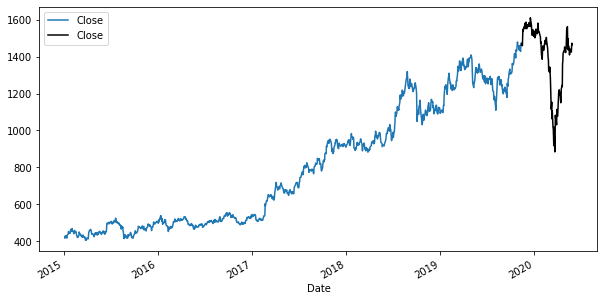

In [30]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
#hes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

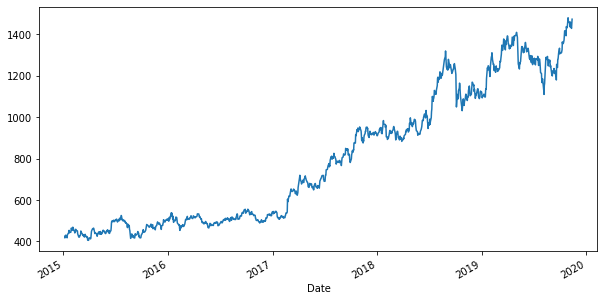

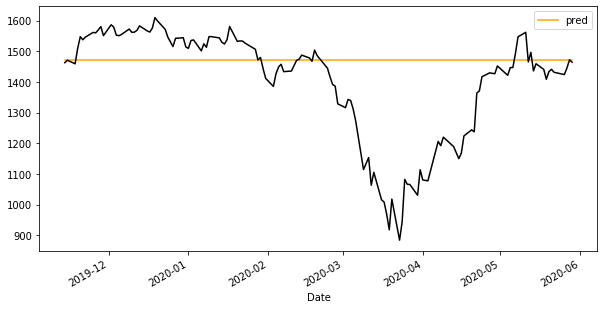

In [31]:
test.shape

a=test.index[0:133]

hes1.shape

hes1.head()

hes1.iloc[0:133]

hes3 = pd.DataFrame(ses1,columns=['pred'])
hes3.head()
hes3.set_index(a,inplace=True)

hes3.head()

train.plot(kind="line",figsize=(10,5))
hes3.plot(kind="line",figsize=(10,5),color='orange')
test.plot(kind="line",figsize=(10,5),color='black')
plt.show()

In [32]:
hwes = ExponentialSmoothing(train , seasonal_periods=12 ,trend='add', seasonal="multiplicative",).fit()
hwes.summary()

C:\Users\RISHIK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Dep. Variable:,endog,No. Observations:,1194
Model:,ExponentialSmoothing,SSE,278068.349
Optimized:,True,AIC,6539.966
Trend:,Additive,BIC,6621.327
Seasonal:,Multiplicative,AICC,6540.548
Seasonal Periods:,12,Date:,"Thu, 11 Jun 2020"
Box-Cox:,False,Time:,15:26:52
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8947368,alpha,True
smoothing_slope,0.0526316,beta,True


In [33]:
hwes1 = hwes.forecast(133)
#print(hwes1)

C:\Users\RISHIK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# report performance
mse = mean_squared_error(test_data, hwes1)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, hwes1)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, hwes1))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(hwes1 - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 3202226.1756749535
MAE: 1780.2208220999796
RMSE: 1789.4765088357415
MAPE: nan


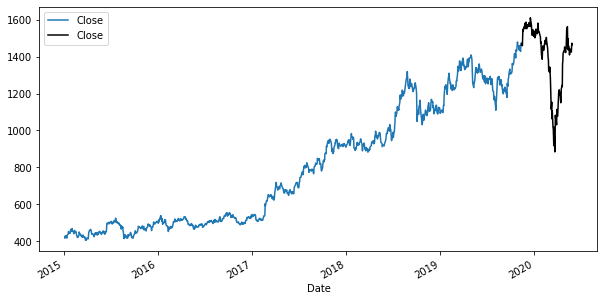

In [35]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
#hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

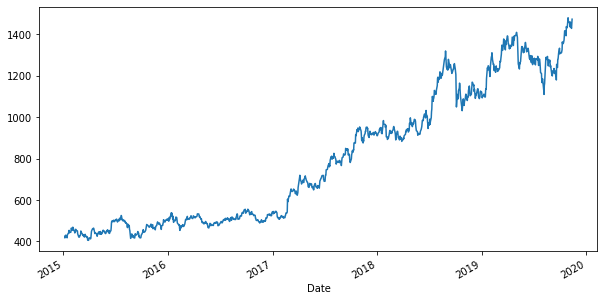

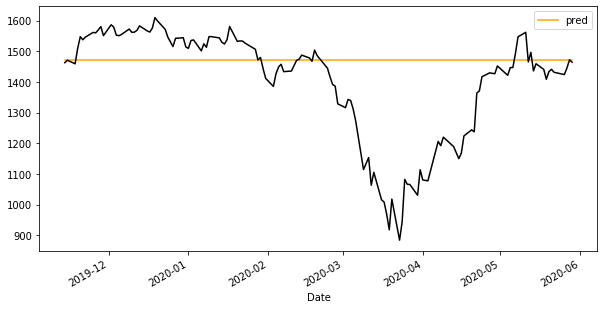

In [36]:
test.shape

a=test.index[0:133]

hwes1.shape

hwes1.head()

hwes1.iloc[0:133]

hwes3 = pd.DataFrame(ses1,columns=['pred'])
hwes3.head()
hwes3.set_index(a,inplace=True)

hwes3.head()

train.plot(kind="line",figsize=(10,5))
hwes3.plot(kind="line",figsize=(10,5),color='orange')
test.plot(kind="line",figsize=(10,5),color='black')
plt.show()

# testing stationarity

In [37]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.DataFrame.rolling(timeseries, window=12).mean()
    rolstd = pd.DataFrame.rolling(timeseries, window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

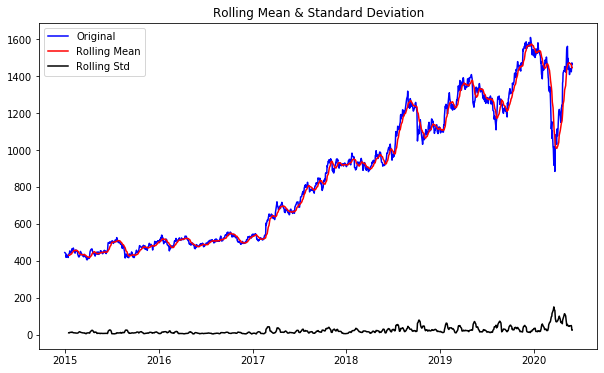

Results of Dickey-Fuller Test:
Test Statistic                   -0.560842
p-value                           0.879587
#Lags Used                       21.000000
Number of Observations Used    1308.000000
Critical Value (1%)              -3.435359
Critical Value (5%)              -2.863752
Critical Value (10%)             -2.567948
dtype: float64


In [38]:
test_stationarity(time1)

In [39]:
#series is not stationary as mean is increasing even though the std.
#pvalue> 0.05 hence H0 accepted that the series is nonstationary

In [40]:
diff1=train.diff()
diff1=diff1.dropna()

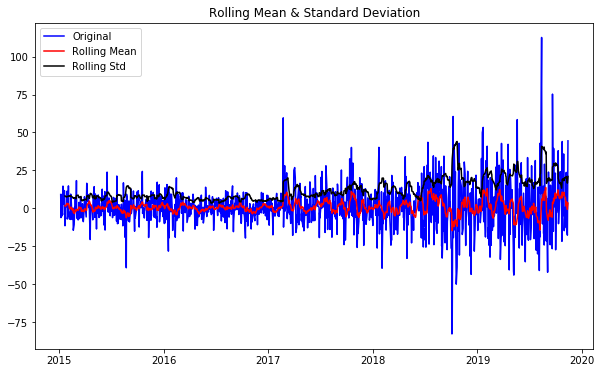

Results of Dickey-Fuller Test:
Test Statistic                -9.913828e+00
p-value                        3.117916e-17
#Lags Used                     1.600000e+01
Number of Observations Used    1.176000e+03
Critical Value (1%)           -3.435923e+00
Critical Value (5%)           -2.864001e+00
Critical Value (10%)          -2.568080e+00
dtype: float64


In [41]:
test_stationarity(diff1)

In [42]:
#pvalue< 0.05 hence H0 rejected that the series is stationary

# ARIMA

In [43]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

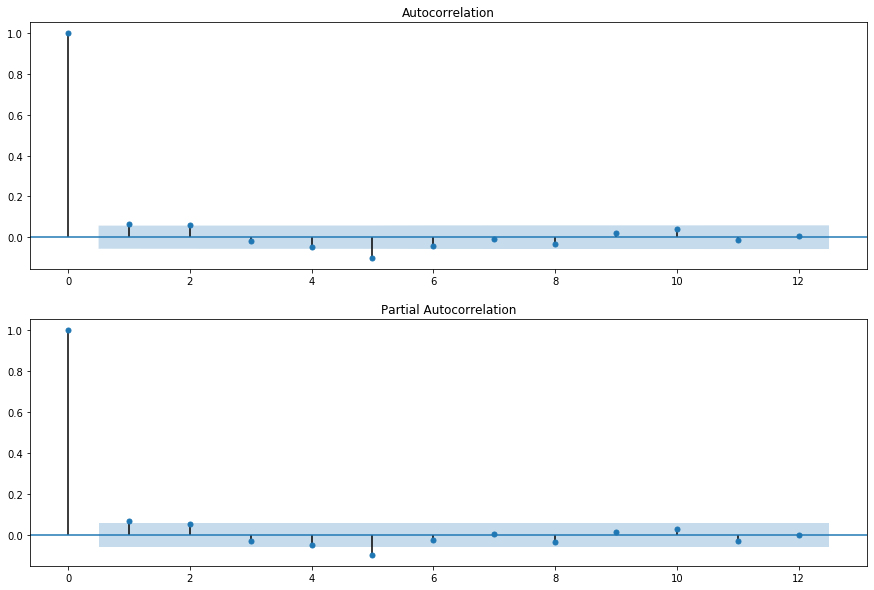

In [44]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff1, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diff1, ax=pyplot.gca(),lags=12)
pyplot.show()

In [45]:
#pip install pmdarima

In [46]:
from statsmodels.tsa.arima_model import ARIMA

In [47]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(2,1,2))
model_fit=model.fit(disp=True)
print(model_fit.summary())

C:\Users\RISHIK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\RISHIK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1193
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4843.069
Method:                       css-mle   S.D. of innovations             14.021
Date:                Thu, 11 Jun 2020   AIC                           9698.138
Time:                        15:26:57   BIC                           9728.643
Sample:                             1   HQIC                          9709.632
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8850      0.401      2.205      0.027       0.098       1.671
ar.L1.D.Close     1.6014      0.060     26.540      0.000       1.483       1.720
ar.L2.D.Close    -0.9117      0.064    -

In [48]:
# Forecast
fc, se, conf = model_fit.forecast(133, alpha=0.05)  # 95% conf

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))
#Around 3.5% MAPE implies the model is about 96.5% accurate in predicting the next 15 observations.

MSE: 2327087.7317963187
MAE: 1525.102424653818
RMSE: 1525.479508809056
MAPE: 210.75491748355876


# Auto ARIMA

C:\Users\RISHIK\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\RISHIK\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


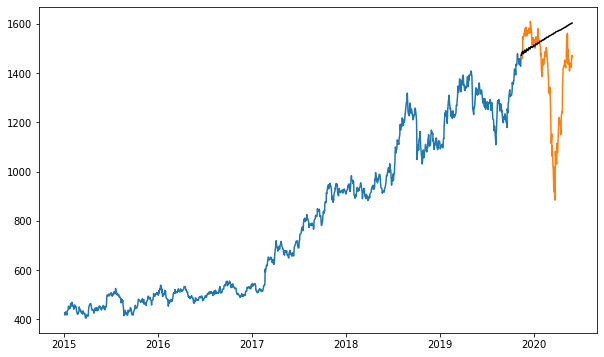

In [50]:
from pmdarima import auto_arima
model = auto_arima(train)
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [51]:
#print(forecast)

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# report performance
mse = mean_squared_error(test_data, forecast)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, forecast)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, forecast))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(forecast - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 2355849.1429908937
MAE: 1534.4468690685633
RMSE: 1534.877566124052
MAPE: 2019-11-14 00:00:00   NaN
2019-11-15 00:00:00   NaN
2019-11-18 00:00:00   NaN
2019-11-19 00:00:00   NaN
2019-11-20 00:00:00   NaN
                       ..
2020-05-26 00:00:00   NaN
2020-05-27 00:00:00   NaN
2020-05-28 00:00:00   NaN
2020-05-29 00:00:00   NaN
Prediction            NaN
Length: 134, dtype: float64


In [53]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1194
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4833.693
Date:                Thu, 11 Jun 2020   AIC                           9679.386
Time:                        15:27:22   BIC                           9709.891
Sample:                             0   HQIC                          9690.880
                               - 1194                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9076      0.430      2.112      0.035       0.065       1.750
ar.L1          0.9894      0.010     99.130      0.000       0.970       1.009
ar.L2         -0.9512      0.011    -84.105      0.0

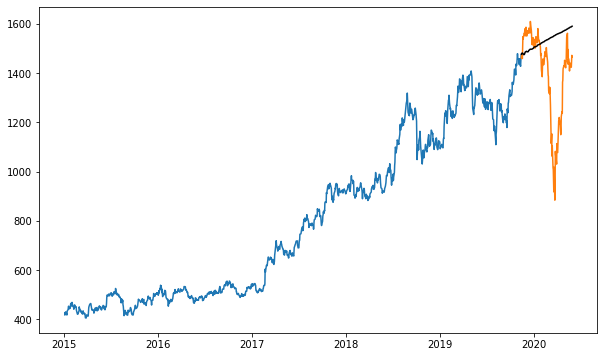

In [54]:
forecast = model_fit.forecast(steps=133)[0]

forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [56]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

162.5159990036389


# SARIMAX

In [57]:
import statsmodels.api as sm

In [58]:
diffs1=diff1.diff(12)
diffs1=diffs1.dropna()

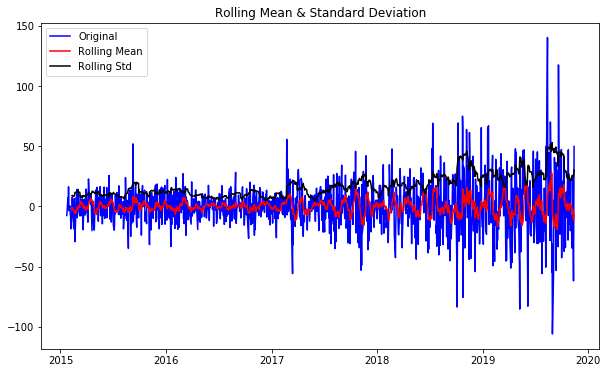

Results of Dickey-Fuller Test:
Test Statistic                -1.275561e+01
p-value                        8.352505e-24
#Lags Used                     2.300000e+01
Number of Observations Used    1.157000e+03
Critical Value (1%)           -3.436015e+00
Critical Value (5%)           -2.864041e+00
Critical Value (10%)          -2.568102e+00
dtype: float64


In [59]:
test_stationarity(diffs1)

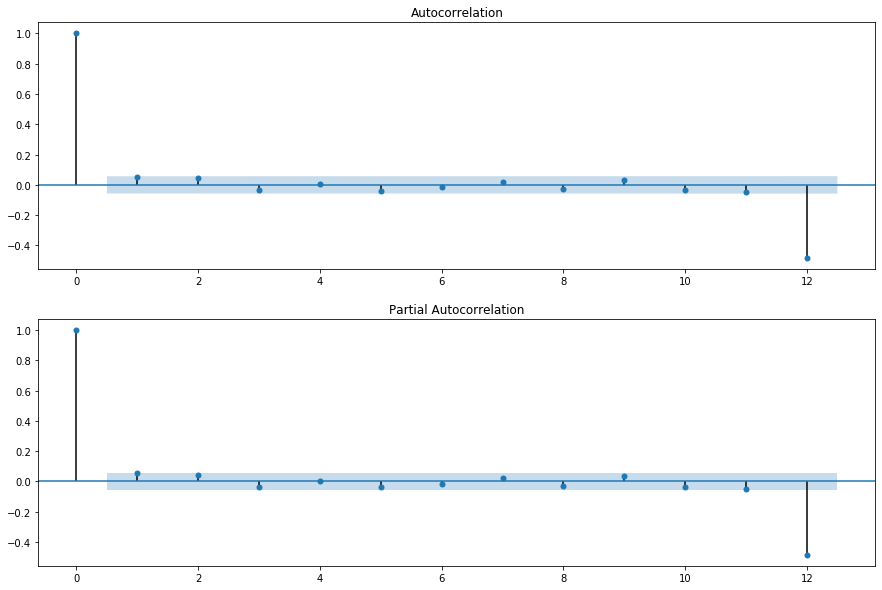

In [60]:
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diffs1, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diffs1, ax=pyplot.gca(),lags=12)
pyplot.show()

In [61]:
train.shape

(1194,)

In [62]:
model = sm.tsa.SARIMAX(train, order=(2,1,2), seasonal_order=(0,1,2,12))

C:\Users\RISHIK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\RISHIK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [63]:
model_fit=model.fit(disp=True)
print(model_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1194
Model:             SARIMAX(2, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -4822.752
Date:                            Thu, 11 Jun 2020   AIC                           9659.503
Time:                                    15:28:12   BIC                           9695.022
Sample:                                         0   HQIC                          9672.894
                                           - 1194                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6099      0.034     47.791      0.000       1.544       1.676
ar.L2         -0.9162      0.033   

In [64]:
forecast = model_fit.forecast(steps=133)


C:\Users\RISHIK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [65]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

163.46717768284418


In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# report performance
mse = mean_squared_error(test_data, forecast)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, forecast)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, forecast))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(forecast - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 2330191.778282118
MAE: 1526.1003911490754
RMSE: 1526.4965700197686
MAPE: nan


# Log Transform

No handles with labels found to put in legend.


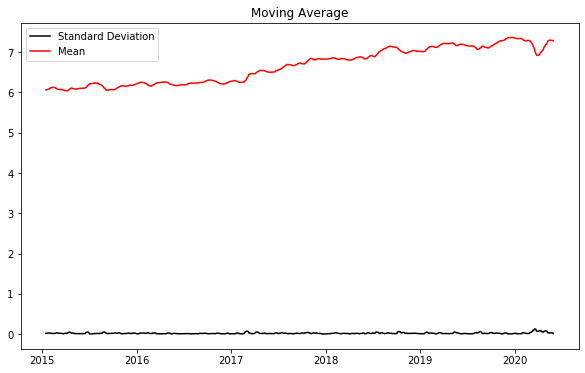

In [67]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(time1)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

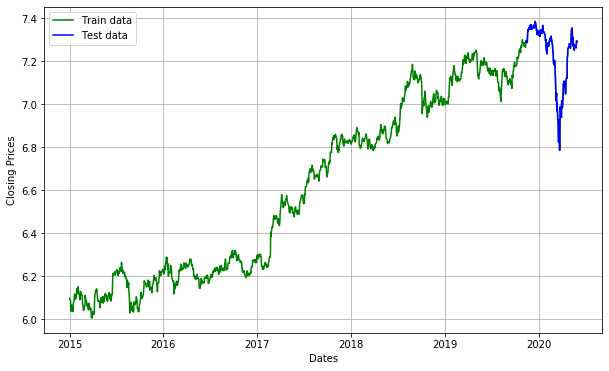

In [68]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [69]:
# Build Model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data, order=(3, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

C:\Users\RISHIK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\RISHIK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1193
Model:                 ARIMA(3, 1, 2)   Log Likelihood                3236.875
Method:                       css-mle   S.D. of innovations              0.016
Date:                Thu, 11 Jun 2020   AIC                          -6459.751
Time:                        15:28:16   BIC                          -6424.161
Sample:                             1   HQIC                         -6446.341
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0011      0.000      2.123      0.034    8.11e-05       0.002
ar.L1.D.Close     0.0903      0.056      1.626      0.104      -0.019       0.199
ar.L2.D.Close    -0.9038      0.043    -

In [70]:
# Forecast
fc, se, conf = fitted.forecast(133, alpha=0.05)  # 95% conf

In [71]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

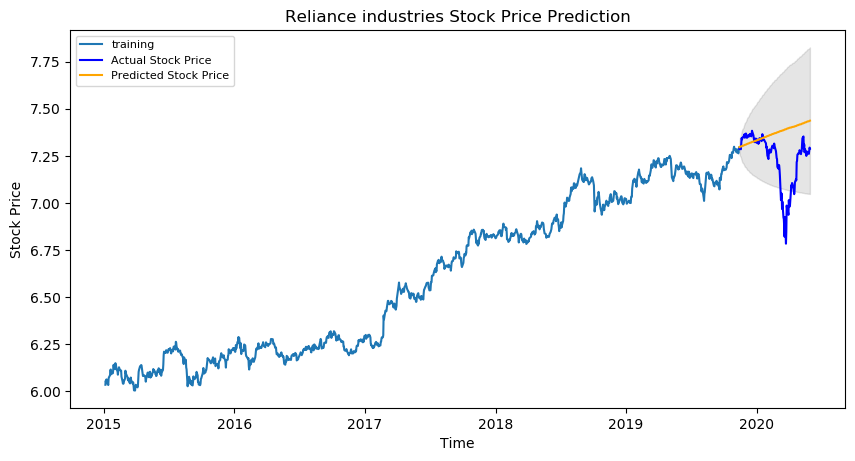

In [72]:
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Reliance industries Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))
#Around 3.5% MAPE implies the model is about 96.5% accurate in predicting the next 15 observations.

MSE: 0.042274677456616824
MAE: 0.14387156768678
RMSE: 0.20560806758640776
MAPE: 0.020267599661441427


# auto amrima


Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=-6455.717, BIC=-6445.548, Time=0.436 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=-6455.974, BIC=-6440.721, Time=0.476 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=-6455.789, BIC=-6440.537, Time=0.821 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=-6452.629, BIC=-6447.545, Time=0.289 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=-6455.695, BIC=-6435.358, Time=0.504 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=-6454.631, BIC=-6434.294, Time=0.547 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=-6453.653, BIC=-6428.232, Time=0.663 seconds
Total fit time: 3.766 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1194
Model:               SARIMAX(1, 1, 0)   Log Likelihood                3230.987
Date:                Thu, 11 Ju

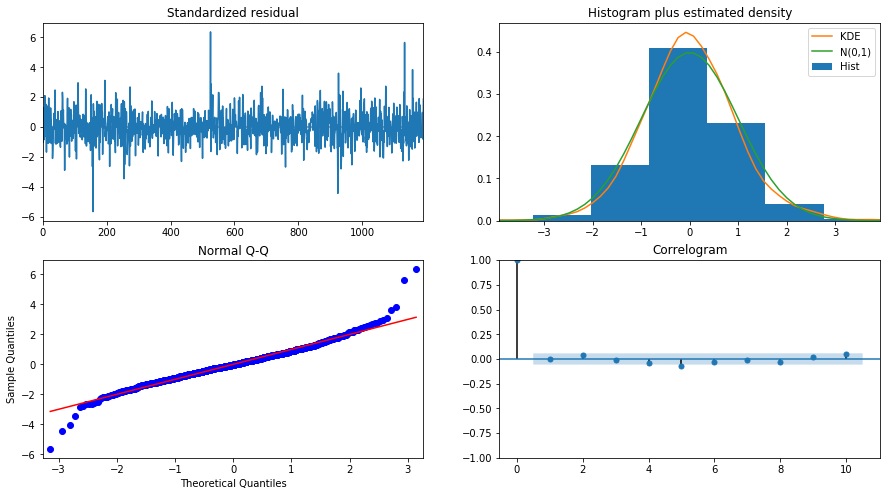

In [74]:
#Auto arima gives the value of p,q,d as 3,1,2
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


In [75]:
mod_fit=model_autoARIMA.fit(train)

In [76]:
fc1= mod_fit.predict(133)

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# report performance
mse = mean_squared_error(test, fc1)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, fc1)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, fc1))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc1 - test)/np.abs(test))
print('MAPE: '+str(mape))
#Around 3.5% MAPE implies the model is about 96.5% accurate in predicting the next 15 observations.

MSE: 54410.831136063425
MAE: 163.06131583524808
RMSE: 233.26129369456783
MAPE: 0.13611965826958847


# Log Transform Split 2

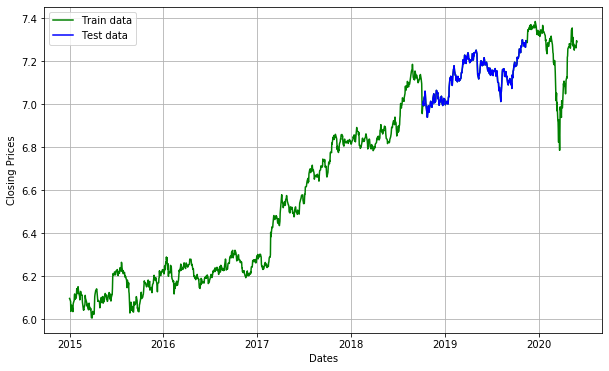

In [78]:
train_data1, test_data1 = df_log[3:int(len(df_log)*0.7)], df_log[int(len(df_log)*0.7):int(len(df_log)*0.9)]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data1, 'blue', label='Test data')
plt.legend()

In [79]:
# Build Model
from statsmodels.tsa.arima_model import ARIMA
model1 = ARIMA(train_data1, order=(3, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

C:\Users\RISHIK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\RISHIK\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1193
Model:                 ARIMA(3, 1, 2)   Log Likelihood                3236.875
Method:                       css-mle   S.D. of innovations              0.016
Date:                Thu, 11 Jun 2020   AIC                          -6459.751
Time:                        15:28:26   BIC                          -6424.161
Sample:                             1   HQIC                         -6446.341
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0011      0.000      2.123      0.034    8.11e-05       0.002
ar.L1.D.Close     0.0903      0.056      1.626      0.104      -0.019       0.199
ar.L2.D.Close    -0.9038      0.043    -

In [80]:
fc1, se1, conf1 = fitted.forecast(267, alpha=0.05)

In [81]:
# Make as pandas series
fc_series1 = pd.Series(fc1, index=test_data1.index)
lower_series1 = pd.Series(conf1[:, 0], index=test_data1.index)
upper_series1 = pd.Series(conf1[:, 1], index=test_data1.index)

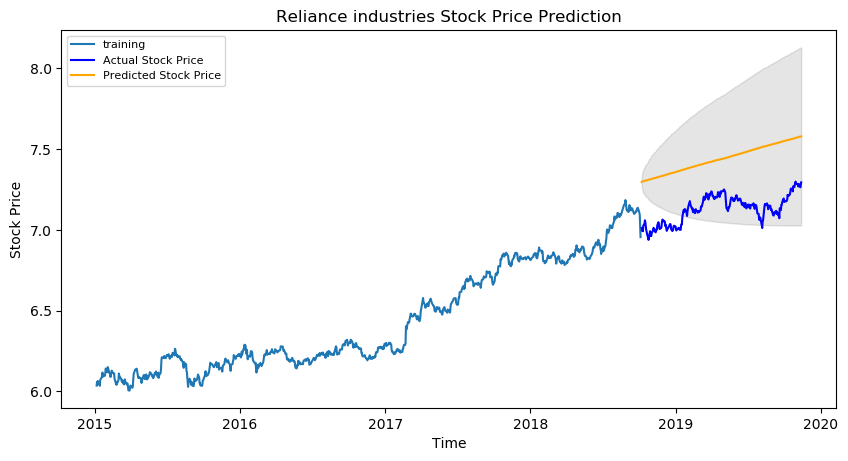

In [82]:
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data1, label='training')
plt.plot(test_data1, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series1, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series1.index, lower_series1, upper_series1, 
                 color='k', alpha=.10)
plt.title('Reliance industries Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# report performance
mse = mean_squared_error(test_data1, fc1)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data1, fc1)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data1, fc1))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc1 - test_data1)/np.abs(test_data1))
print('MAPE: '+str(mape))
#Around 3.5% MAPE implies the model is about 96.5% accurate in predicting the next 15 observations.

MSE: 0.10202468788003703
MAE: 0.31265891284795877
RMSE: 0.3194130364904304
MAPE: 0.04393070507452563


Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=-5063.685, BIC=-5054.023, Time=0.500 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=-5065.068, BIC=-5050.575, Time=0.459 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=-5064.828, BIC=-5050.335, Time=0.405 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=-5061.977, BIC=-5057.146, Time=0.098 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=-5064.241, BIC=-5044.917, Time=0.646 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=-5062.991, BIC=-5043.667, Time=0.679 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=-5060.825, BIC=-5036.671, Time=0.866 seconds
Total fit time: 3.680 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  927
Model:               SARIMAX(1, 1, 0)   Log Likelihood                2535.534
Date:                Thu, 11 Ju

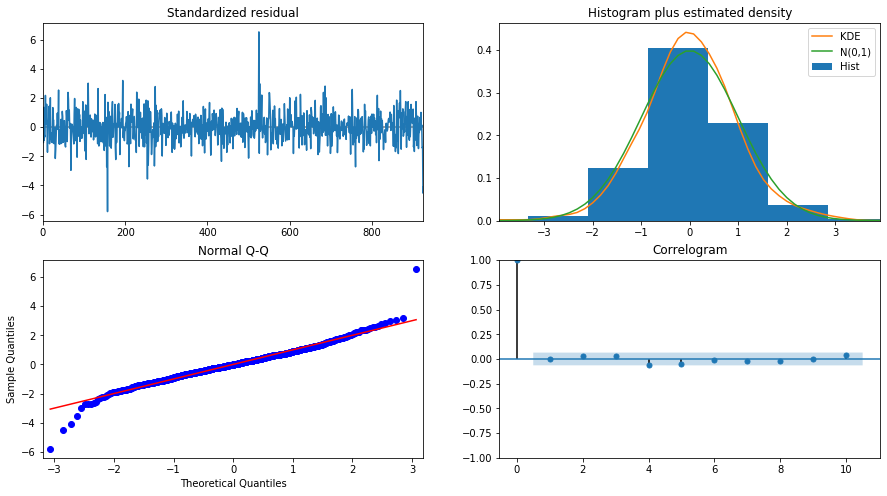

In [84]:
#Auto arima gives the value of p,q,d as 3,1,2
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(train_data1, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


In [85]:
mod_fit=model_autoARIMA.fit(train)

fc1= mod_fit.predict(133)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# report performance
mse = mean_squared_error(test, fc1)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, fc1)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, fc1))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc1 - test)/np.abs(test))
print('MAPE: '+str(mape))
#Around 3.5% MAPE implies the model is about 96.5% accurate in predicting the next 15 observations.

MSE: 54410.831136063425
MAE: 163.06131583524808
RMSE: 233.26129369456783
MAPE: 0.13611965826958847


# Comparison

In [86]:
model_list = ['Simple expo smooting','Exponential smooting with trend','Exponential smoothing with Trend and seasonality',
              'ARIMA(2,1,2)','Auto_ARIMA(SARIMAX(2,1,2))','SARIMAX(2,1,2),(0,1,2,12)','log(ARIMA(3, 1, 2))',
              'Auto_ARIMA_SARIMAX(1, 1, 0)','Log_Split_2_ARIMA(3, 1, 2)','Log_Split_2_Auto_ARIMA(3, 1, 2)']
aic_list = [6337.392,6336.753,6539.966,9698.138,9679.386,9659.503,-6459.751,-6455.974,-6459.751,-5065.068]
bic_list =[6347.562,6357.093,6621.327,9728.643,9709.891,9695.022,-6424.161,-6440.721,-6424.161,-5050.575]

mse_list = [2146399.221202068,2324543.94916541,3202226.1756749535,2327087.7317963187,2355849.1429908937,2330191.778282118,
           1.0431809776993062,54410.831136063425,1.1074108110157115, 54410.831136063425]
mae_list = [1465.059453417077,1524.2665150212326,1780.2208220999796,1525.102424653818,1534.4468690685633,1526.1003911490754,
           1.1547357936117724,163.06131583524808,1.3670551665432202,163.06131583524808]
rmse_list = [1465.0594599544647,1524.6455159037494,1789.4765088357415,1525.479508809056,1534.877566124052,1526.4965700197686,
            1.2282717101490472,233.26129369456783,1.37631967777214,233.26129369456783]


In [87]:
model_name = ['Simple expo smooting','Exponential smooting with trend','Exponential smoothing with Trend and seasonality',
              'ARIMA(2,1,2)','Auto_ARIMA(SARIMAX(2,1,2))','SARIMAX(2,1,2),(0,1,2,12)','log(ARIMA(3, 1, 2))',
              'Auto_ARIMA_SARIMAX(1, 1, 0)','Log_Split_2_ARIMA(3, 1, 2)','Log_Split_2_Auto_ARIMA(3, 1, 2)']
aic_list = [6337.392,6336.753,6539.966,9698.138,9679.386,9659.503,-6459.751,-6455.974,-6459.751,-5065.068]
bic_list =[6347.562,6357.093,6621.327,9728.643,9709.891,9695.022,-6424.161,-6440.721,-6424.161,-5050.575]

mse_list = [2146399.221202068,2324543.94916541,3202226.1756749535,2327087.7317963187,2355849.1429908937,2330191.778282118,
           1.0431809776993062,54410.831136063425,1.1074108110157115, 54410.831136063425]
mae_list = [1465.059453417077,1524.2665150212326,1780.2208220999796,1525.102424653818,1534.4468690685633,1526.1003911490754,
           1.1547357936117724,163.06131583524808,1.3670551665432202,163.06131583524808]
rmse_list = [1465.0594599544647,1524.6455159037494,1789.4765088357415,1525.479508809056,1534.877566124052,1526.4965700197686,
            1.2282717101490472,233.26129369456783,1.37631967777214,233.26129369456783]
ind = ['aic','bic','mse','mae','rmse']
       
comp_table1 = pd.DataFrame(list(zip(aic_list,bic_list,mse_list,mae_list,rmse_list)), index=model_name,columns=ind)

In [88]:
comp_table1

,aic,bic,mse,mae,rmse
Simple expo smooting,6337.392,6347.562,2.146399e+06,1465.059453,1465.059460
Exponential smooting with trend,6336.753,6357.093,2.324544e+06,1524.266515,1524.645516
Exponential smoothing with Trend and seasonality,6539.966,6621.327,3.202226e+06,1780.220822,1789.476509
"ARIMA(2,1,2)",9698.138,9728.643,2.327088e+06,1525.102425,1525.479509
"Auto_ARIMA(SARIMAX(2,1,2))",9679.386,9709.891,2.355849e+06,1534.446869,1534.877566
"SARIMAX(2,1,2),(0,1,2,12)",9659.503,9695.022,2.330192e+06,1526.100391,1526.496570
"log(ARIMA(3, 1, 2))",-6459.751,-6424.161,1.043181e+00,1.154736,1.228272
"Auto_ARIMA_SARIMAX(1, 1, 0)",-6455.974,-6440.721,5.441083e+04,163.061316,233.261294
"Log_Split_2_ARIMA(3, 1, 2)",-6459.751,-6424.161,1.107411e+00,1.367055,1.376320
"Log_Split_2_Auto_ARIMA(3, 1, 2)",-5065.068,-5050.575,5.441083e+04,163.061316,233.261294


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

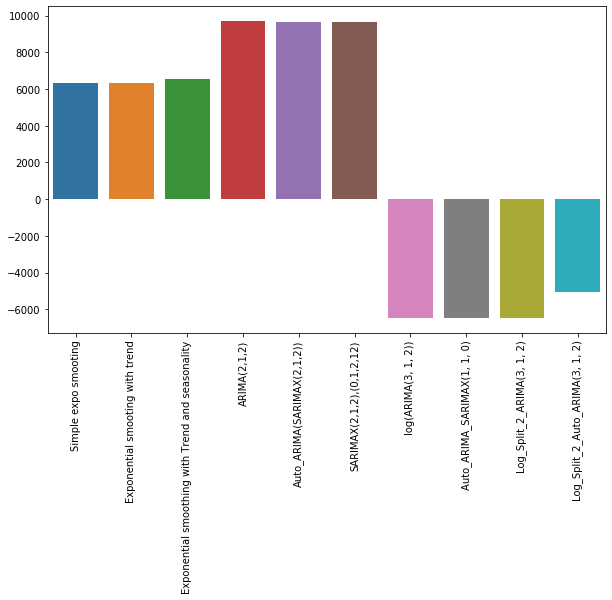

In [89]:
import seaborn as sns
sns.barplot(x=model_list, y=aic_list)
plt.xticks(rotation= 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

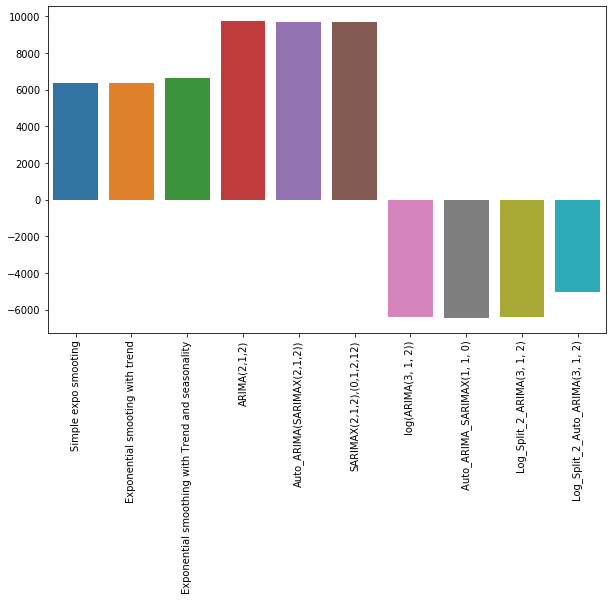

In [90]:
import seaborn as sns
sns.barplot(x=model_list, y=bic_list)
plt.xticks(rotation= 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

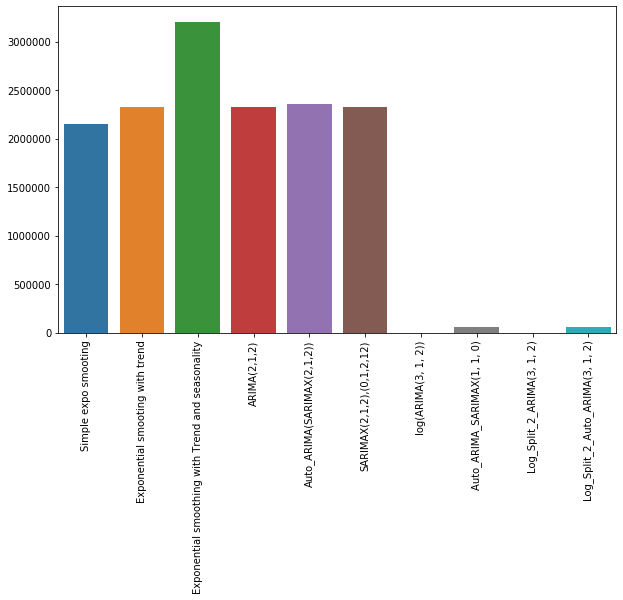

In [91]:
import seaborn as sns
sns.barplot(x=model_list, y=mse_list)
plt.xticks(rotation= 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

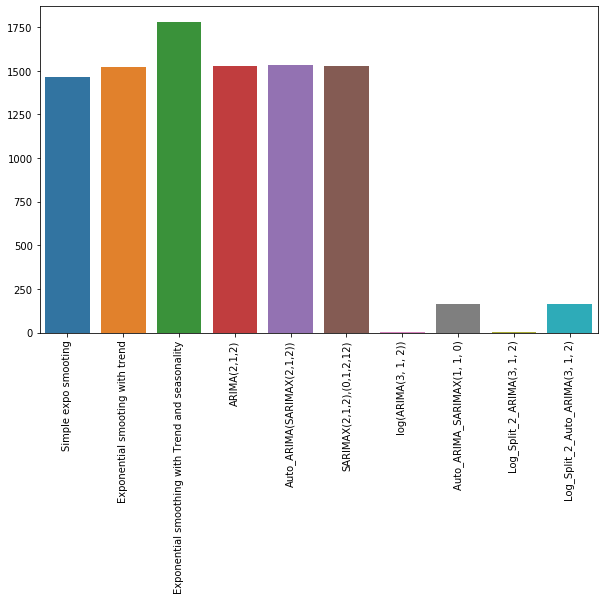

In [92]:
import seaborn as sns
sns.barplot(x=model_list, y=mae_list)
plt.xticks(rotation= 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

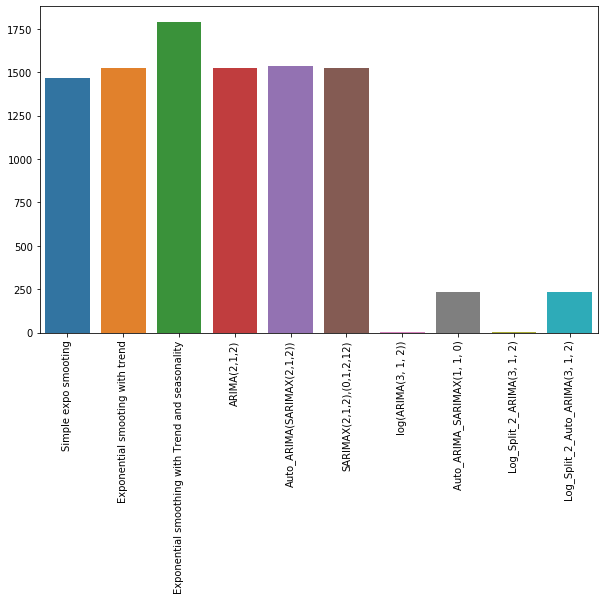

In [93]:
import seaborn as sns
sns.barplot(x=model_list, y=rmse_list)
plt.xticks(rotation= 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

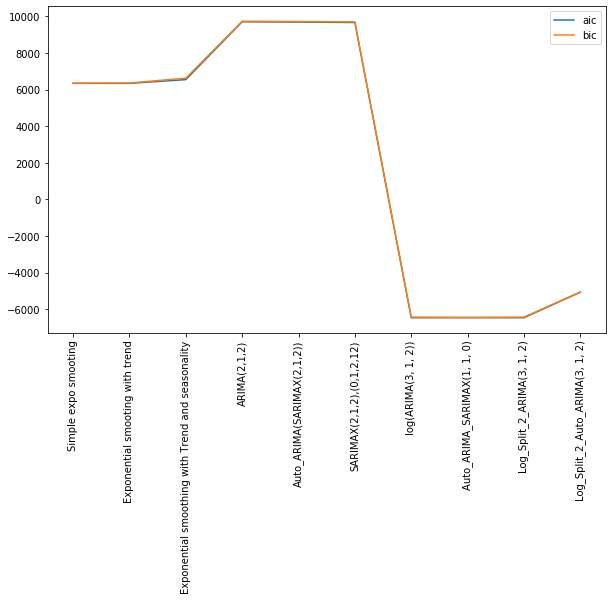

In [94]:
plt.plot(model_list,aic_list,
         model_list,bic_list)
y = ['aic','bic']
plt.legend(y)
plt.xticks(rotation= 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

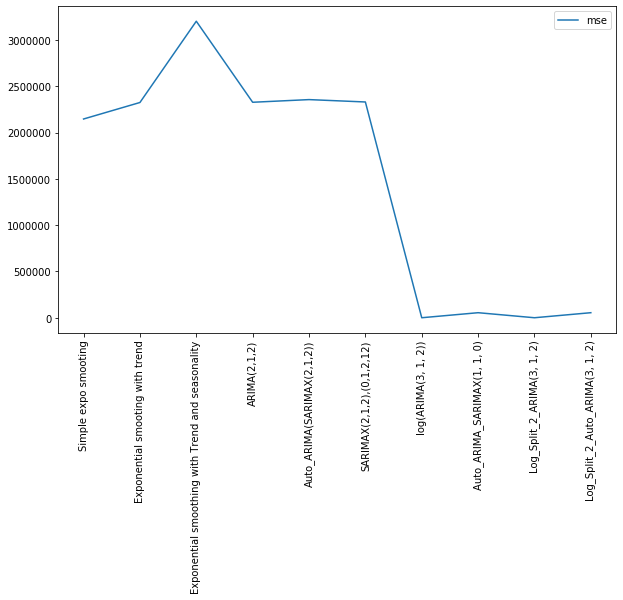

In [95]:
plt.plot(model_list,mse_list)
y = ['mse']
plt.legend(y)
plt.xticks(rotation= 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

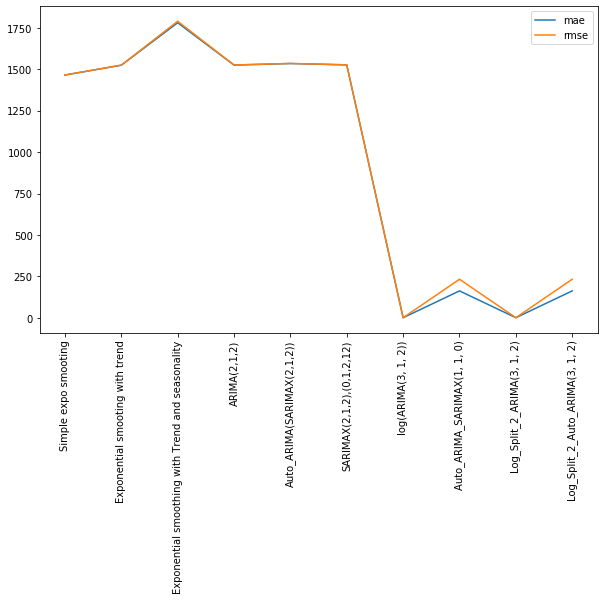

In [96]:
plt.plot(
         model_list,mae_list,
         model_list,rmse_list)
y = ['mae','rmse']
plt.legend(y)
plt.xticks(rotation= 90)